# Case II Description

1. The case consists of doing an exploratory (unsupervised) analysis using the data source or parts of the data source.
2. Real-world applications often require working with non-standardized data, and designing an ML-pipeline from data curation and pre-processing to evaluation is part of the solution, as much as model development.
3. Please choose one of the following three topics and continue your exploration along that for the case:
- Explore clustering methods to derive insights from the data.
- Use decomposition and subspace methods to investigate low-dimension representation of the data.
- Employ Canonical correlation analysis and other supervised methods to model the response (emotions) using the features as input.

4. General tasks:
- An interpretation of the model should be present. 
- You are allowed to use other data sources as well. 
- You may supplement your unsupervised analysis with a supervised analysis, if you wish. 
- Formulate a clear purpose for your project, so the aim of your analysis is clear. 
- What are your research questions? 
- What kind of representation would you like to derive from the features of the biosignals? 
- What could it be used for?

### From evaluation pdf

- Make a presentation of the solution. 
- Make a technical foundation of your solution. 
- Make a clear aim and to what extent the aim is achieved, including expected accuracy (if supervised)
- Write the limitations of your work are important information to include in the presentation and the report. 
- Make a concise description of the chosen approach/method including pros and cons of the method should be included in the report


In [19]:
# read data
import pandas as pd

X=pd.read_csv('HR_features_scaled.csv')

print(X.head())

   HR_TD_Mean  HR_TD_Median  HR_TD_std  HR_TD_Min  HR_TD_Max  HR_TD_AUC  \
0    0.010023     -0.062352   0.187214  -0.163880   0.001629  -0.312526   
1   -0.176801     -0.069806  -0.793634   0.111690  -0.570809  -0.086288   
2   -0.033122      0.038688  -0.774299   0.369032  -0.544302  -0.988619   
3    0.398059      0.532294   0.163883   0.068800   0.206917   0.153083   
4   -0.551609     -0.376240  -0.671610  -0.410499  -0.703343  -0.311621   

   HR_TD_Kurtosis  HR_TD_Skew  HR_TD_Slope_min  HR_TD_Slope_max  ...  \
0       -0.621392   -0.007322        -0.414857         0.978121  ...   
1       -0.114281   -0.045281         0.532375        -0.699948  ...   
2       -0.336389   -0.740408        -0.158848        -0.343025  ...   
3       -0.486637   -0.513035         0.263566         0.280258  ...   
4        0.152870   -1.139046         0.500374        -0.385643  ...   

   EDA_TD_T_AUC  EDA_TD_T_Kurtosis  EDA_TD_T_Skew  EDA_TD_T_Slope_min  \
0     -0.674626           0.276417      -1.

In [20]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   HR_TD_Mean           312 non-null    float64
 1   HR_TD_Median         312 non-null    float64
 2   HR_TD_std            312 non-null    float64
 3   HR_TD_Min            312 non-null    float64
 4   HR_TD_Max            312 non-null    float64
 5   HR_TD_AUC            312 non-null    float64
 6   HR_TD_Kurtosis       312 non-null    float64
 7   HR_TD_Skew           312 non-null    float64
 8   HR_TD_Slope_min      312 non-null    float64
 9   HR_TD_Slope_max      312 non-null    float64
 10  HR_TD_Slope_mean     312 non-null    float64
 11  HR_TD_Slope          312 non-null    float64
 12  TEMP_TD_Mean         312 non-null    float64
 13  TEMP_TD_Median       312 non-null    float64
 14  TEMP_TD_std          312 non-null    float64
 15  TEMP_TD_Min          312 non-null    flo

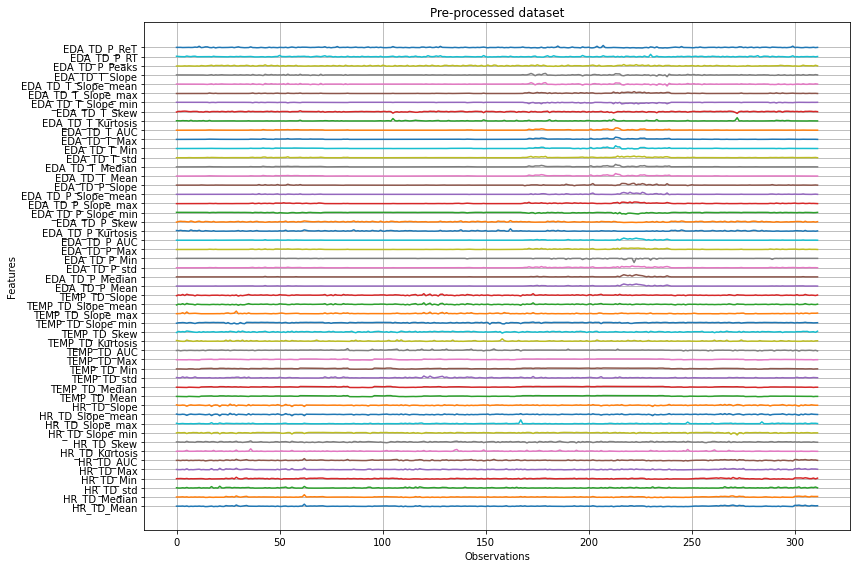

In [21]:
# Make an EEG-like plot

import matplotlib.pyplot as plt
import numpy as np

# Create an EEG-like plot
plt.figure(figsize=(12, 8))

# Offset for stacking the features
offset = 30  # Adjust the offset for better spacing between features

# Iterate through each feature (column) in the dataset
for i, column in enumerate(X.columns):
    # Add an offset to stack the features vertically
    plt.plot(X.index, X[column] + i * offset, label=column)

# Add labels and title
plt.yticks(np.arange(len(X.columns)) * offset, X.columns)
plt.xlabel("Observations")
plt.ylabel("Features")
plt.title("Pre-processed dataset")
plt.grid(True)

# Add a legend (optional, can be removed if too cluttered)
#plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1.05))

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import FastICA
import numpy as np
from scipy.stats import kurtosis

# Define the number of components (e.g., 5 components)
n_components = 3

# Initialize the ICA model
ica = FastICA(n_components=n_components, random_state=42)

print('numerical X shape: ',np.shape(X))

# Apply ICA to the numerical data
independent_components = ica.fit_transform(X)

# Determine the number of components to use using the kurtosis criterion
kurtosis_scores = [kurtosis(independent_components[:, i]) for i in range(independent_components.shape[1])]
print(kurtosis_scores)
n_components = np.argmax(kurtosis_scores) + 1
print(n_components)

# Convert the result to a DataFrame for easier interpretation
ica_df = pd.DataFrame(independent_components, columns=[f'IC_{i+1}' for i in range(n_components+1)])

# Display the independent components
print('ica_df shape: ',np.shape(ica_df))
print(ica_df.head())



numerical X shape:  (312, 51)
[4.4168059875529275, 12.701800692120806, 5.9071581959060975]
2
ica_df shape:  (312, 3)
       IC_1      IC_2      IC_3
0 -0.016148 -0.004039  0.076987
1 -0.015434  0.028836  0.045134
2 -0.026660  0.026614  0.062412
3  0.037851  0.032624  0.036939
4 -0.040410  0.014129  0.072243


In [32]:
import numpy as np
import pandas as pd

# Assuming `ica_df` is the DataFrame containing the independent components
# Each column in `ica_df` represents an IC

# Calculate the variance of each IC
ic_variances = ica_df.var(axis=0)

# Calculate the total variance
total_variance = ic_variances.sum()

# Calculate the percentage contribution of each IC
ic_percentage_contributions = (ic_variances / total_variance) * 100

# Create a DataFrame for better readability
ic_contributions_df = pd.DataFrame({
    "IC": ic_variances.index,
    "Variance": ic_variances.values,
    "Percentage": ic_percentage_contributions.values
})

# Display the contributions
print("Percentage Contribution of Each IC to the Dataset:")
print(ic_contributions_df)

Percentage Contribution of Each IC to the Dataset:
     IC  Variance  Percentage
0  IC_1  0.003215   33.333333
1  IC_2  0.003215   33.333333
2  IC_3  0.003215   33.333333


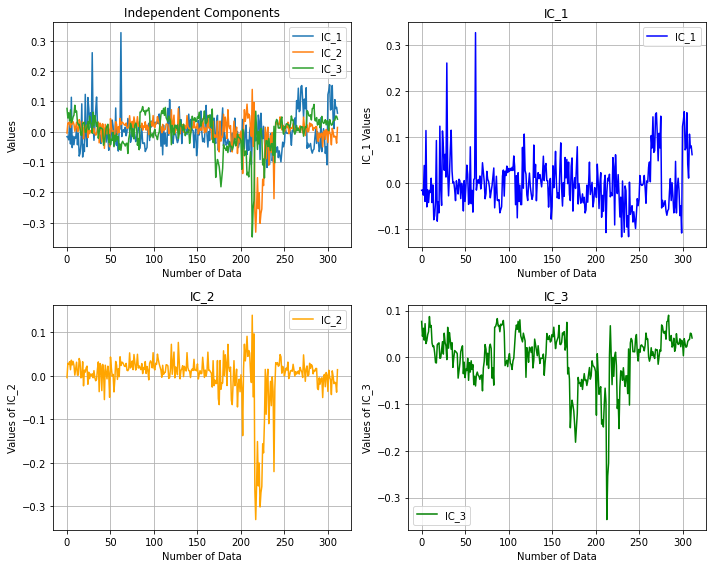

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot data on each subplot
for i in range(ica_df.shape[1]):
    axs[0,0].plot(ica_df[f'IC_{i+1}'], label=f'IC_{i+1}')
axs[0, 0].set_title("Independent Components")
axs[0, 0].set_xlabel("Number of Data")
axs[0, 0].set_ylabel("Values")
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].plot(ica_df[f'IC_1'], label=f'IC_1',color='blue')
axs[0, 1].set_title("IC_1")
axs[0, 1].set_xlabel("Number of Data")
axs[0, 1].set_ylabel("IC_1 Values")
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(ica_df[f'IC_2'], label=f'IC_2',color='orange')
axs[1, 0].set_title("IC_2")
axs[1, 0].set_xlabel("Number of Data")
axs[1, 0].set_ylabel("Values of IC_2")
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].plot(ica_df[f'IC_3'], label=f'IC_3', color='green')
axs[1, 1].set_title("IC_3")
axs[1, 1].set_xlabel("Number of Data")
axs[1, 1].set_ylabel("Values of IC_3")
axs[1, 1].grid(True)
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

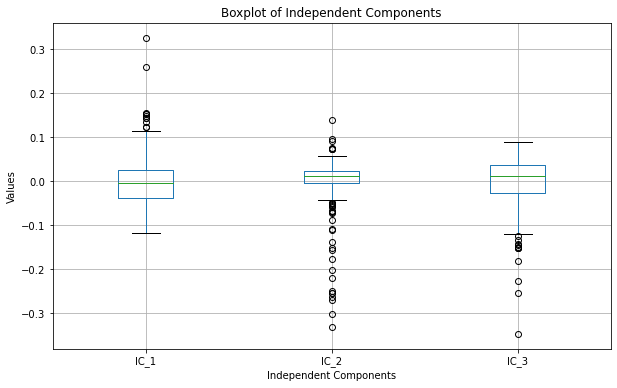

Extreme values (True indicates an outlier):
      IC_1   IC_2   IC_3
0    False  False  False
1    False  False  False
2    False  False  False
3    False  False  False
4    False  False  False
..     ...    ...    ...
307  False  False  False
308  False  False  False
309  False  False  False
310  False  False  False
311  False  False  False

[312 rows x 3 columns]
(312, 3)
Indices of extreme values: (array([ 21,  29,  62, 266, 269, 270, 275, 300, 301, 302, 305], dtype=int64),)
Indices of extreme values: (array([ 43,  49, 120, 128, 174, 175, 185, 189, 190, 196, 202, 204, 207,
       213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
       226, 227, 229, 232, 233, 235, 238, 294], dtype=int64),)
Indices of extreme values: (array([171, 176, 177, 178, 201, 207, 208, 209, 213, 214, 215, 227],
      dtype=int64),)


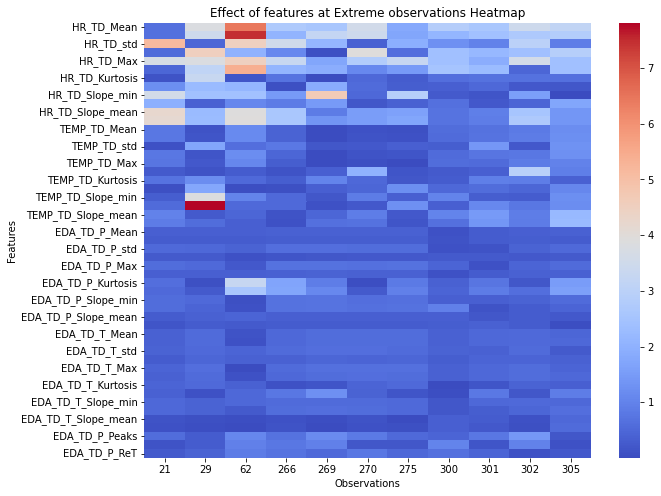

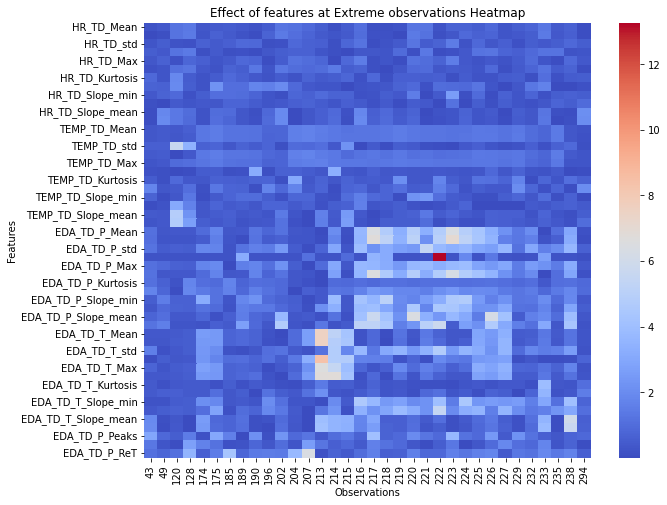

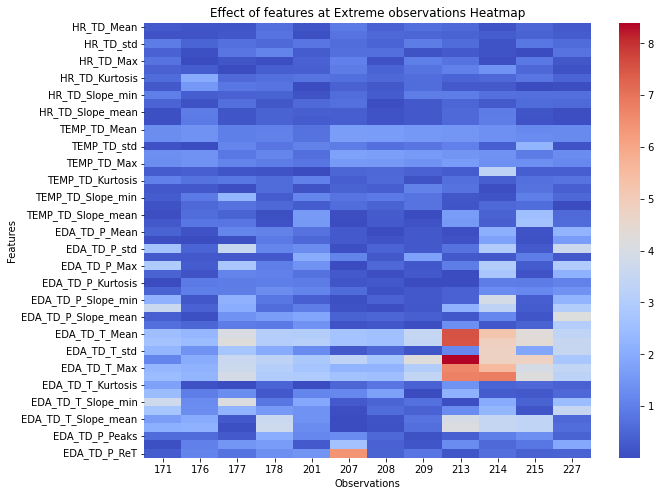

In [24]:
# based on the plots, I have to determine outliers and find the exact number of the data

import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for each independent component
ica_df.boxplot(figsize=(10, 6))
plt.title("Boxplot of Independent Components")
plt.xlabel("Independent Components")
plt.ylabel("Values")
plt.show()

# Calculate Q1, Q3, and IQR for each independent component
Q1 = ica_df.quantile(0.25)
Q3 = ica_df.quantile(0.75)
IQR = Q3 - Q1

# Identify extreme values
extreme_values = (ica_df < (Q1 - 1.5 * IQR)) | (ica_df > (Q3 + 1.5 * IQR))

# Print the extreme values
print("Extreme values (True indicates an outlier):")
print(extreme_values)
print(np.shape(extreme_values))

# Optionally, get the indices of extreme values
ic1_ex = np.where(extreme_values['IC_1'])
ic2_ex = np.where(extreme_values['IC_2'])
ic3_ex = np.where(extreme_values['IC_3'])
print("Indices of extreme values:", ic1_ex)
print("Indices of extreme values:", ic2_ex)
print("Indices of extreme values:", ic3_ex)

# make HEATMAP for the observations, this is to see which features affect the observations the most
# READ ME: These are the extreme values of the ICs. So you must seperate the feautes that effect the 
# extreme obs for each IC

aex=[list(ic1_ex[0]),list(ic2_ex[0]),list(ic3_ex[0])]

for i in aex:
    #print(aex)
    EX=X.iloc[i]
    #print(EX.head())
    #print(np.shape(EX))
    TEX=EX.T

    # Generate a 70x3 random dataset for demonstration
    data = TEX  # Replace this with your actual data
    columns = TEX.columns.tolist()
    idf = pd.DataFrame(data, columns=columns)
    idf=idf.abs()

    # Create the heatmap
    plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
    sns.heatmap(idf, annot=False, cmap='coolwarm', cbar=True)

    # Add labels and title
    plt.title("Effect of features at Extreme observations Heatmap")
    plt.xlabel("Observations")
    plt.ylabel("Features")

    # Show the plot
    plt.show()


(51, 3)


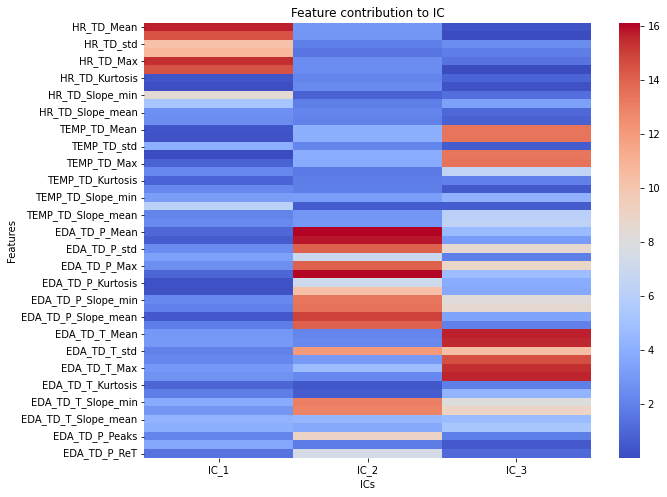

In [30]:
#3. Relate ICs to Original Features
#The mixing_ matrix from the ICA model shows how the original features contribute to each IC:

#Each column of the mixing_ matrix corresponds to an IC, and each row corresponds to an original feature. 
# Larger absolute values indicate stronger contributions.

print(np.shape(ica.mixing_))
#print(ica.mixing_)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a 70x3 random dataset for demonstration
data = ica.mixing_  # Replace this with your actual data
columns = ['IC_1', 'IC_2', 'IC_3']
idf = pd.DataFrame(data, index=X.columns,columns=columns)
idf=idf.abs()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(idf, annot=False, cmap='coolwarm', cbar=True)

# Add labels and title
plt.title("Feature contribution to IC")
plt.xlabel("ICs")
plt.ylabel("Features")

# Show the plot
plt.show()

In [26]:
# Corelations the same as before HEATMAp
# Create a dictionary to store correlations greater than the mean
IC_correlations = {}

# Iterate over each IC column
for ic in ica_df.columns:
    # Compute correlations between the IC column and all other features in X
    correlations = idf[ic]
    
    # Filter correlations greater than the mean
    filtered_correlations = correlations[correlations > 10]
    
    # Store the filtered correlations in the dictionary
    IC_correlations[ic] = filtered_correlations.index.tolist()
# Print the resulting dictionary
print(IC_correlations)
#IC_correlations['IC_1_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_1']]
#IC_correlations['IC_2_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_2']]
#IC_correlations['IC_3_n']=[X.columns.tolist()[i] for i in IC_correlations['IC_3']]

#print(IC_correlations['IC_1_n'])
print(' ')
#print(IC_correlations['IC_2_n'])
common_values = set(IC_correlations['IC_1']) & set(IC_correlations['IC_2'])
print(common_values)

# Add sns pairplot here for the features

{'IC_1': ['HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min', 'HR_TD_Max', 'HR_TD_AUC'], 'IC_2': ['EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max', 'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_std', 'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max'], 'IC_3': ['TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_Min', 'TEMP_TD_Max', 'EDA_TD_T_Mean', 'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max', 'EDA_TD_T_AUC']}
 
set()


In [31]:
import numpy as np
import pandas as pd

# Assuming `ica_df` is the DataFrame containing the independent components
sparsity_scores = {}

for column in ica_df.columns:
    component = ica_df[column].values
    l1_norm = np.sum(np.abs(component))  # L1 norm
    l2_norm = np.sqrt(np.sum(component**2))  # L2 norm
    sparsity = l1_norm / l2_norm
    sparsity_scores[column] = sparsity

# Display sparsity scores for each independent component
print("Sparsity Scores for Independent Components:")
for ic, score in sparsity_scores.items():
    print(f"{ic}: {score}")

Sparsity Scores for Independent Components:
IC_1: 12.85489771973072
IC_2: 9.85331358741967
IC_3: 12.923979345285082


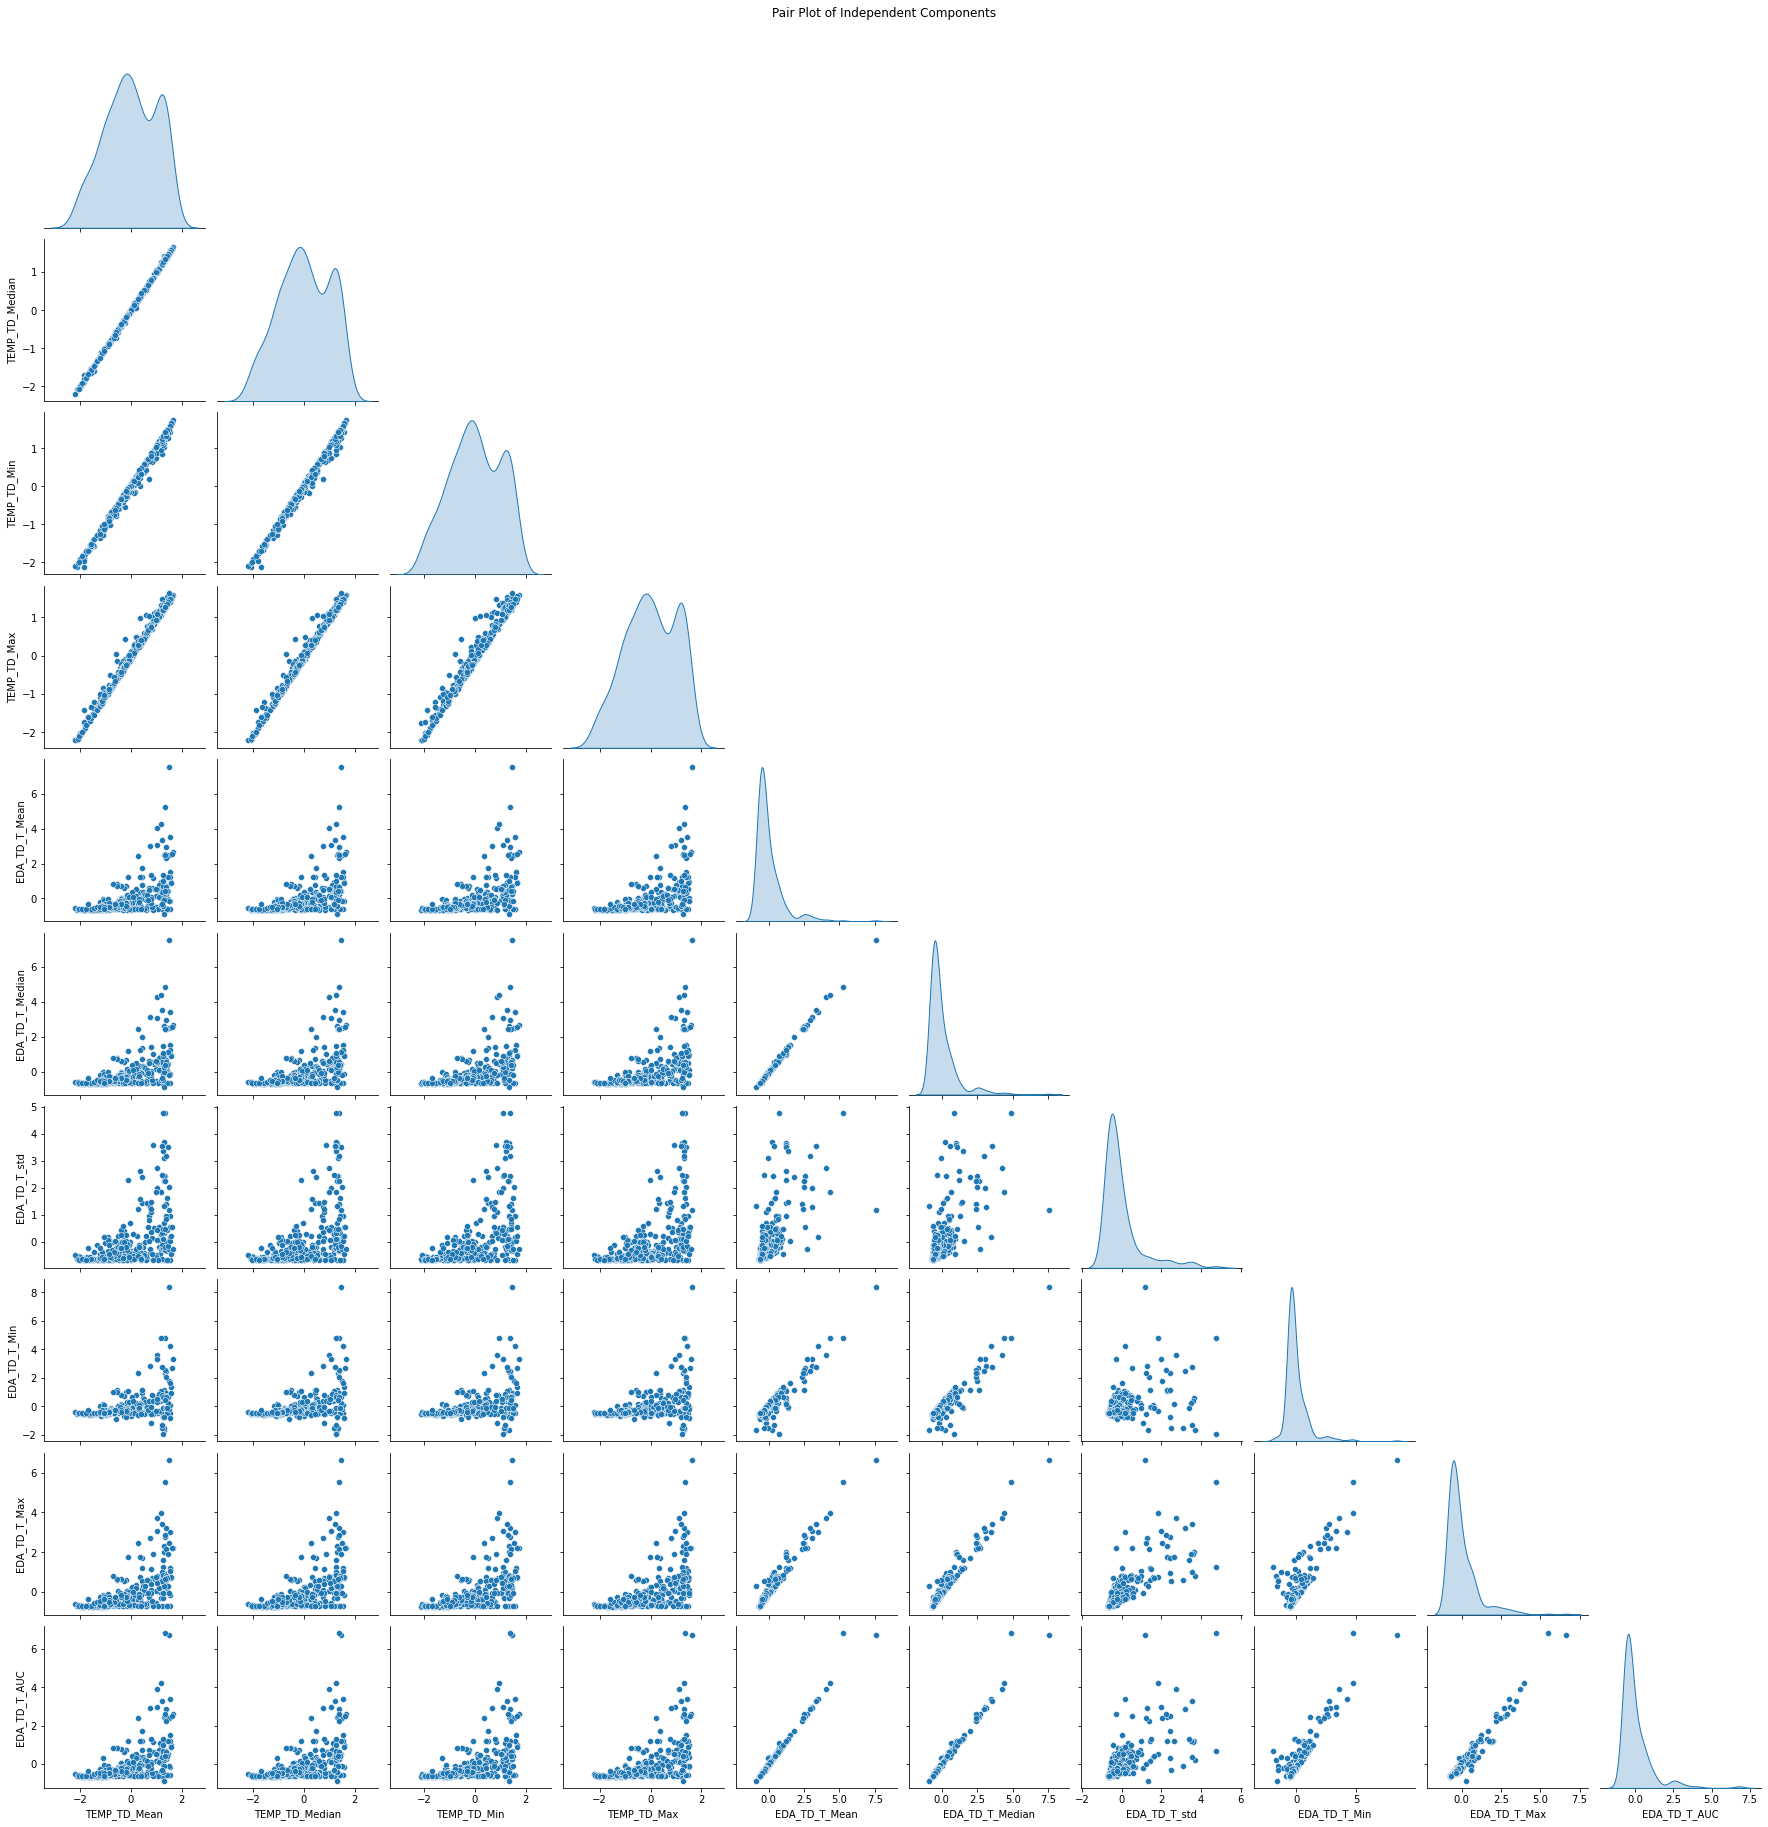

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of the DataFrame for the pair plot (e.g., numerical columns or independent components)
pairplot_data = X[IC_correlations['IC_3']]  # Replace with the DataFrame you want to visualize

# Create the pair plot
sns.pairplot(pairplot_data, diag_kind="kde", corner=True)

# Add a title to the plot
plt.suptitle("Pair Plot of Independent Components", y=1.02)

# Show the plot
plt.show()


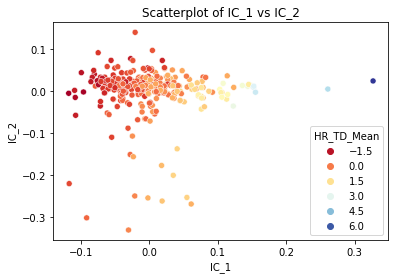

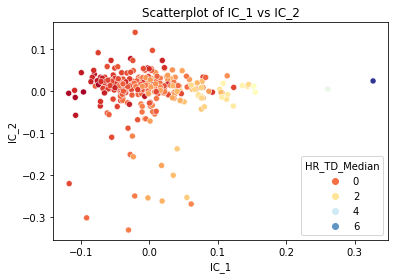

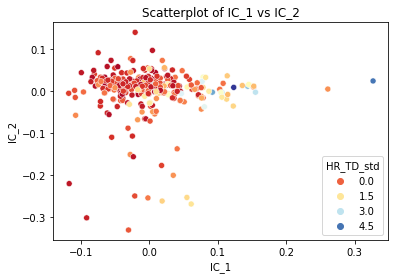

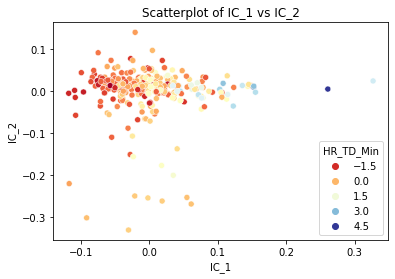

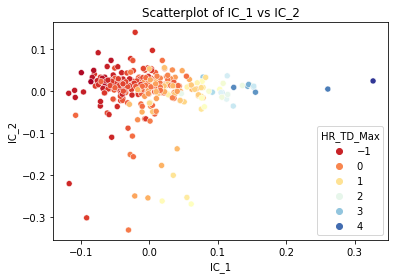

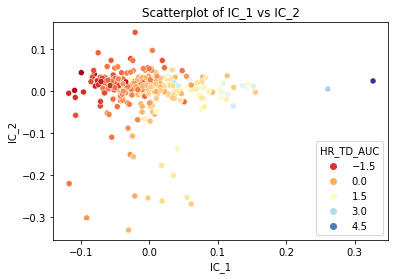

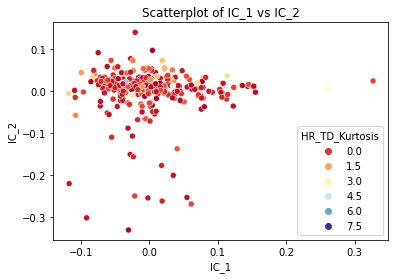

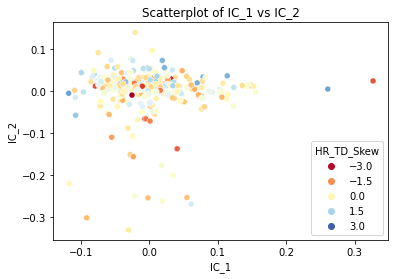

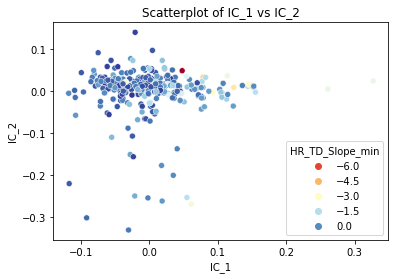

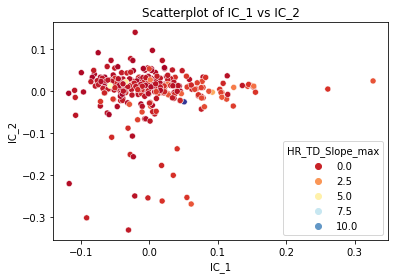

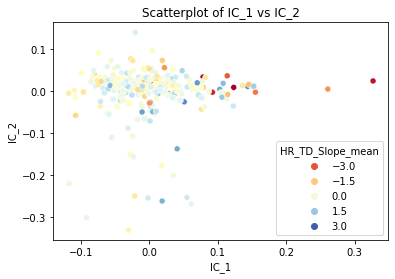

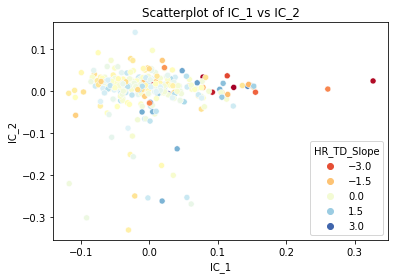

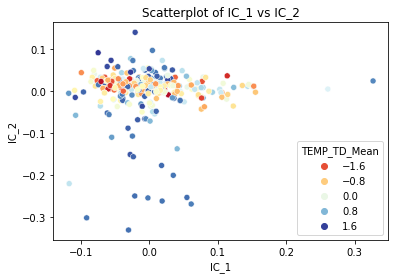

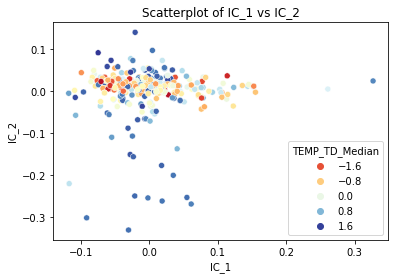

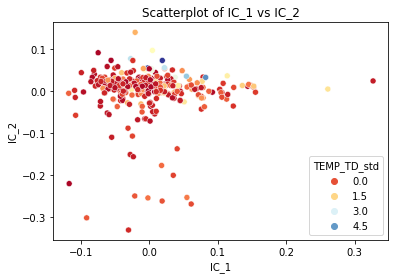

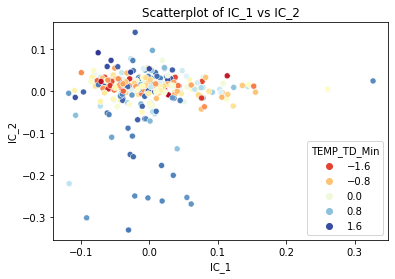

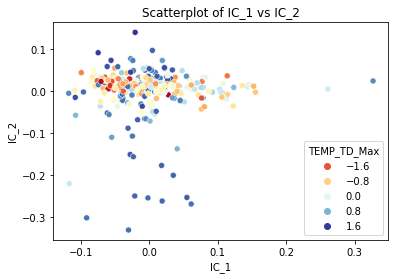

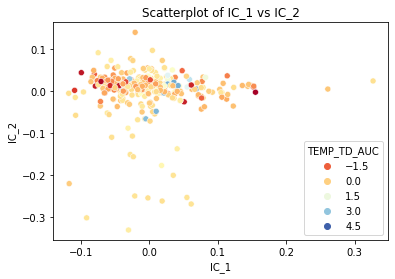

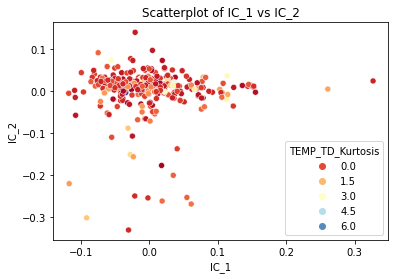

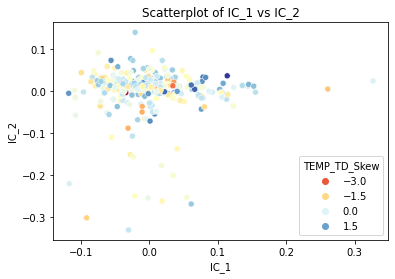

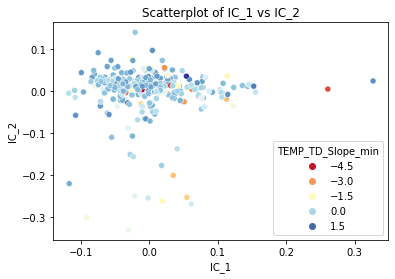

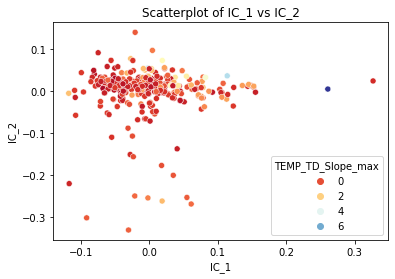

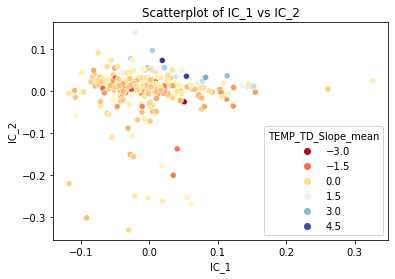

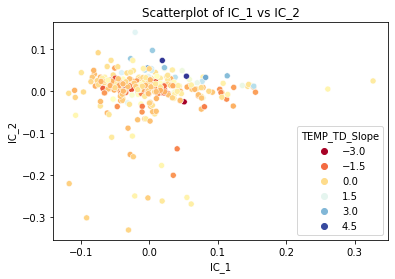

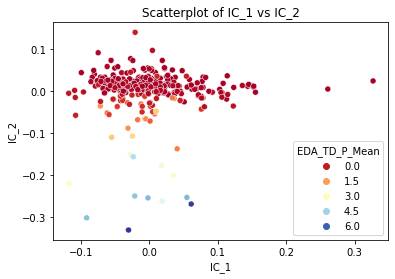

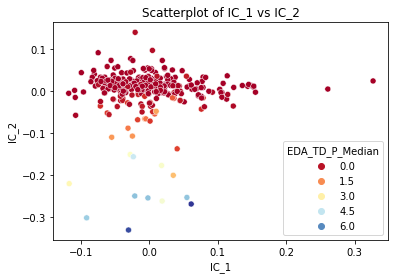

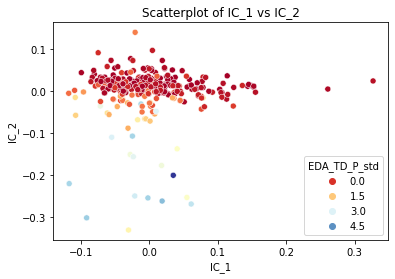

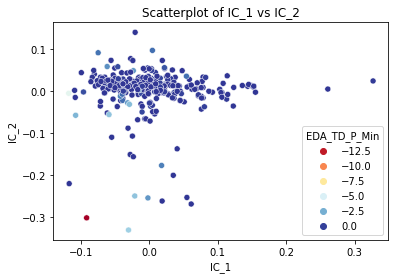

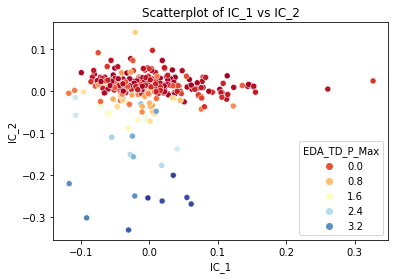

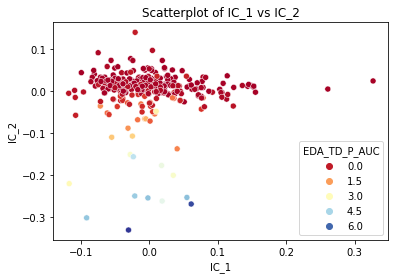

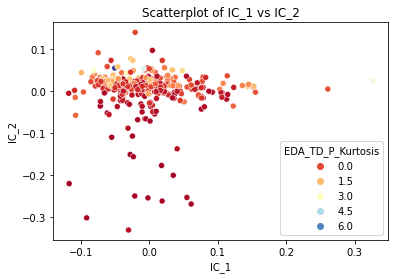

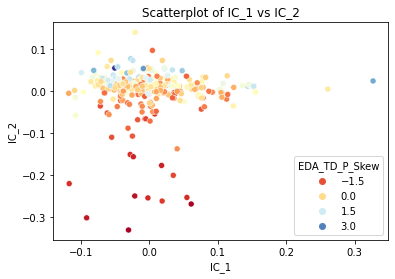

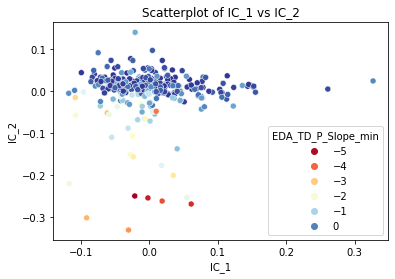

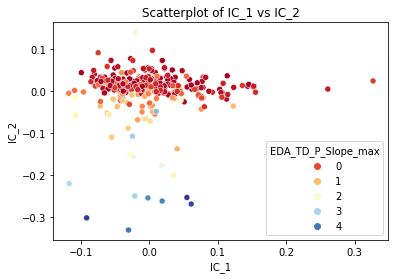

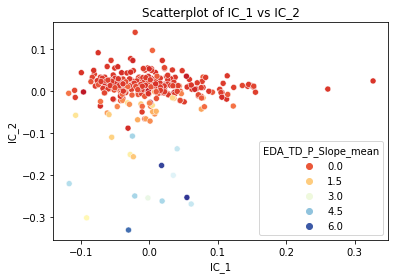

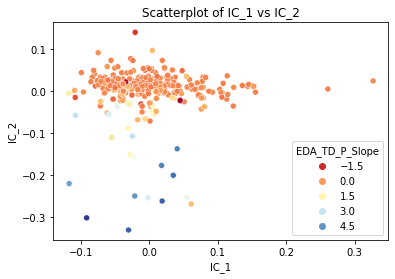

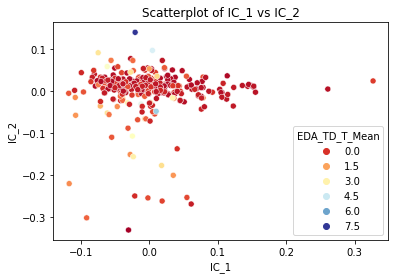

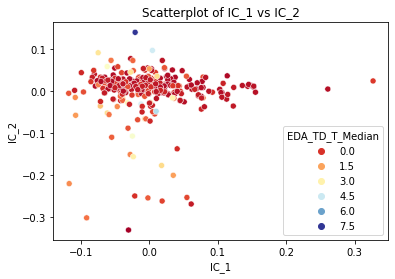

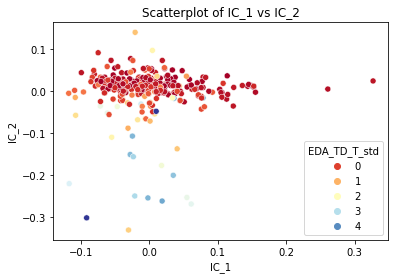

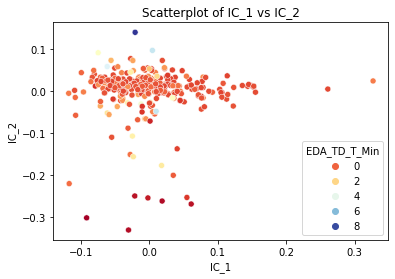

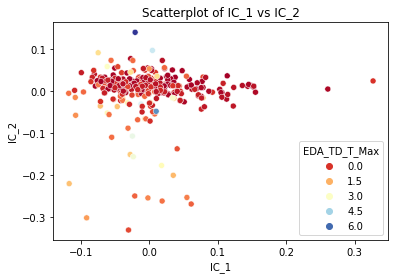

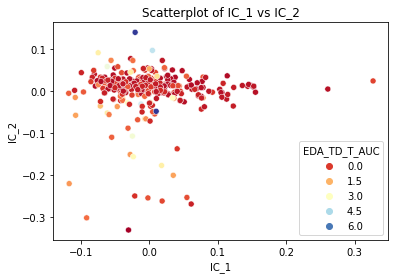

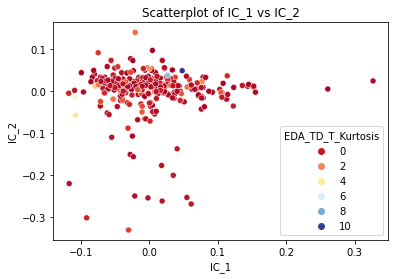

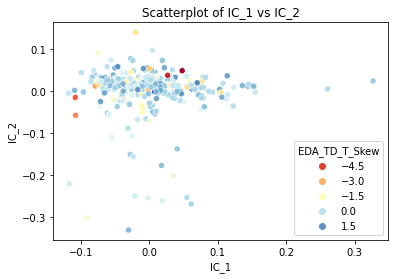

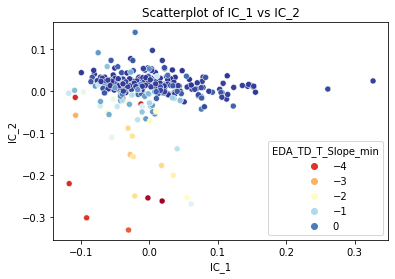

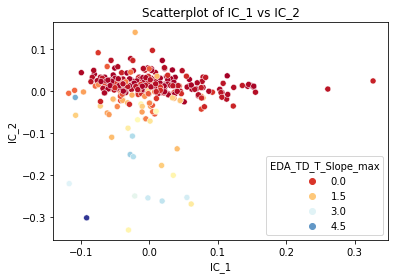

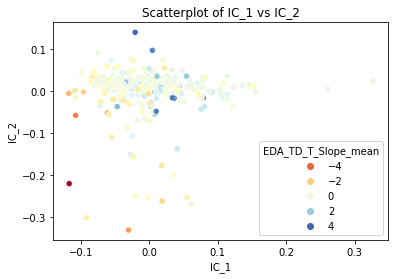

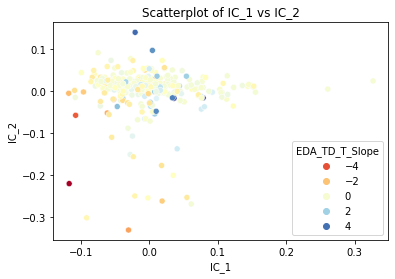

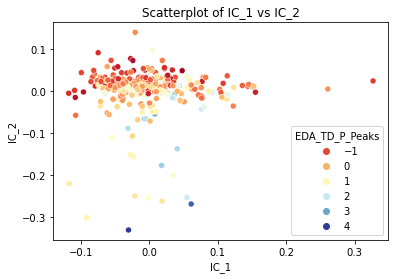

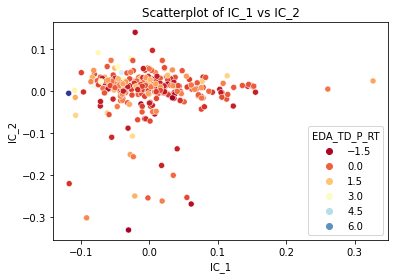

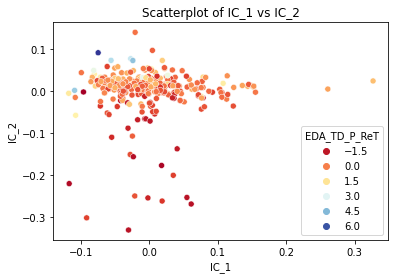

In [28]:
#Visualize ICs in Reduced Space
# If you reduced the data to 2 or 3 ICs, visualize the data in the reduced space to identify clusters or patterns:

import seaborn as sns

for i in X.columns.tolist():
    sns.scatterplot(x=ica_df['IC_1'], y=ica_df['IC_2'], hue=X[i], palette='RdYlBu')
    plt.title("Scatterplot of IC_1 vs IC_2")
    plt.show()

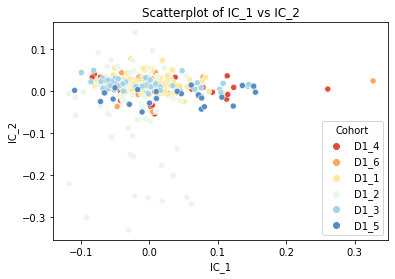

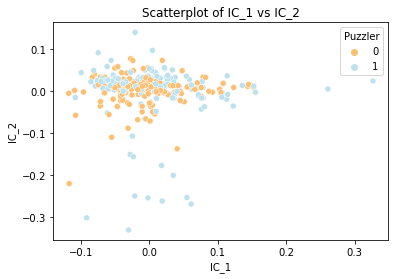

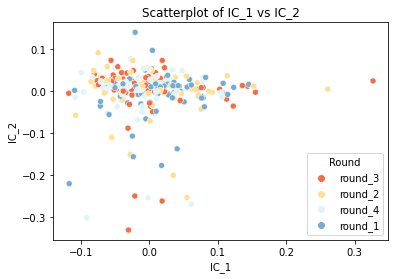

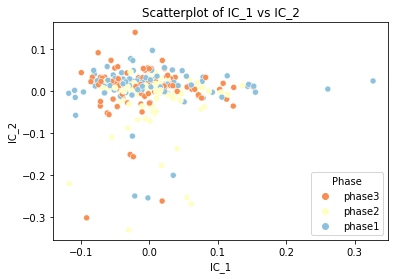

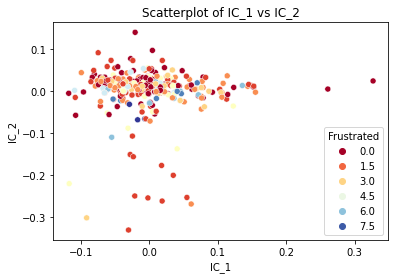

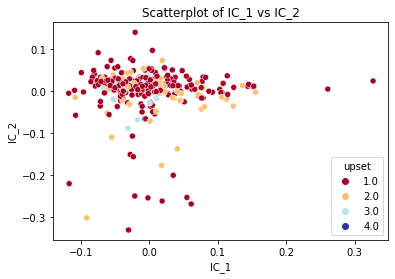

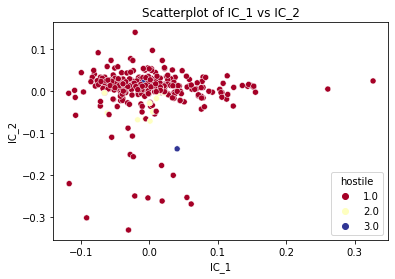

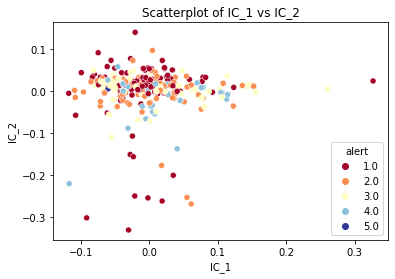

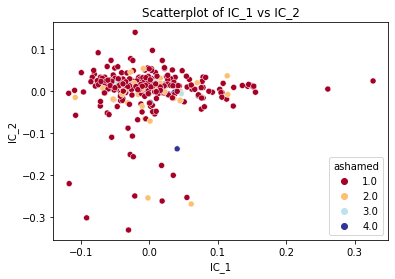

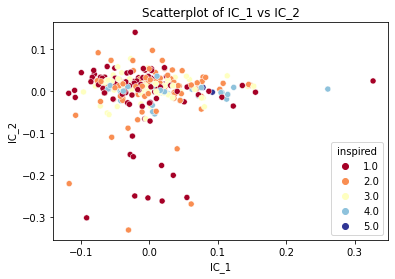

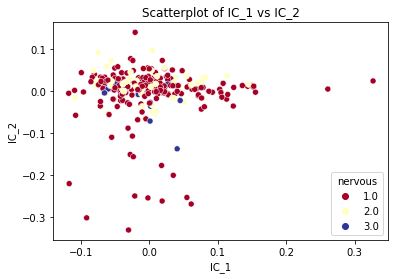

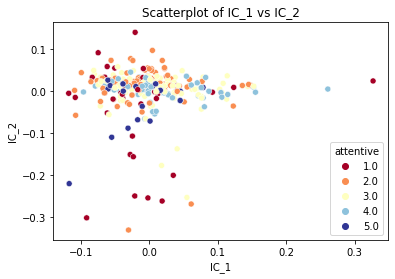

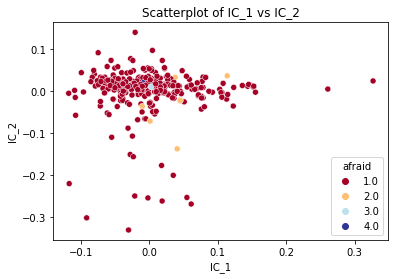

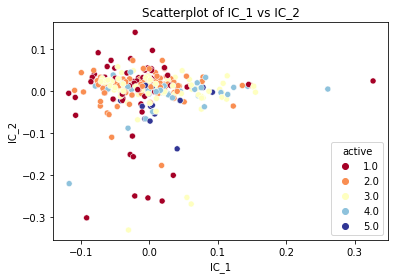

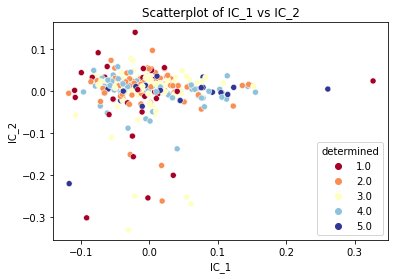

In [29]:
#Visualize ICs in Reduced Space
# If you reduced the data to 2 or 3 ICs, visualize the data in the reduced space to identify clusters or patterns:

import seaborn as sns

df=pd.read_csv('HR_data.csv')

# categorical
cc=['Cohort', 'Puzzler','Round', 'Phase', 'Frustrated', 'upset', 'hostile', 'alert', 'ashamed', 'inspired', 'nervous', 'attentive', 'afraid', 'active', 'determined']

for i in cc:
    sns.scatterplot(x=ica_df['IC_1'], y=ica_df['IC_2'], hue=df[i], palette='RdYlBu')
    plt.title("Scatterplot of IC_1 vs IC_2")
    plt.show()